# ExoRNN: Sample Run for final Dataset

# Import necessary packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

os.chdir("/home/mohsen/projects/exosomians-v2/")
os.environ["CUDA_VISIBLE_DEVICES"] = '2'

In [3]:
import exopy as exo
import scanpy as sc
import numpy as np
import pandas as pd

/home/mohsen/miniconda3/envs/exo/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data setup

In [4]:
exo.ml.ExoGRU.setup_dataset('./data/design.mat.csv', seq_key='seq', 
                            target_key='label')

Successfully loaded the dataset with 175959 sequences!


# Model Instatiation

In [9]:
import pandas as pd

In [5]:
config = {
    'activation_fn': 'relu', 
    'batch_size': 32, 
    'bidirectional': False, 
    'dropout_rate': 0.1, 
    'lr': 0.00011342016019358544, 
    'n_head_hidden': 512, 'n_head_layers': 2, 
    'n_hidden': 1024, 
    'n_layers': 1, 
    'network': 
    'exogru', 
    'use_batch_norm': True, 
    'use_layer_norm': False
}

In [6]:
# network = exo.ml.ExoGRU.load('./saved_models/ExoGRU/last.ckpt')

In [7]:
network = exo.ml.ExoGRU(**config)

/home/mohsen/miniconda3/envs/exo/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [8]:
network.module

ExoNetModule(
  (input_embedding): Embedding(8, 8)
  (rnn): RNNCell(
    (rnn): GRU(8, 1024, batch_first=True)
  )
  (head): MLP(
    (network): Sequential(
      (0): Linear(in_features=1024, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.1, inplace=False)
      (4): Linear(in_features=512, out_features=512, bias=True)
      (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.1, inplace=False)
    )
    (classifier): Linear(in_features=512, out_features=1, bias=True)
  )
  (loss): BCEWithLogitsLoss()
)

In [8]:
network.fit(max_epochs=1000,
            batch_size=32, 
            early_stopping_patience=3,
            train_size=0.8, 
            check_val_every_n_epoch=1,
            save_path='./saved_models/ExoGRU/')

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/mohsen/miniconda3/envs/exo/lib/python3.9/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:611: UserWarning: Checkpoint directory /home/mohsen/projects/exosomians-v2/saved_models/ExoGRU exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [2]

  | Name            | Type              | Params
------------------------------------------------------
0 | input_embedding | Embedding         | 64    
1 | rnn             | RNNCell           | 3.2 M 
2 | head            | MLP               | 790 K 
3 | loss            | BCEWithLogitsLoss | 0     
------------------------------------------------------
4.0 M     Trainable params
64        Non-trainable params
4.0 M     Total params
15.866    Total estimated model params size (MB)


Epoch 0:  22%|█████████████▉                                                 | 1220/5499 [00:37<02:09, 32.96it/s, loss=0.785, v_num=3]

/home/mohsen/miniconda3/envs/exo/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


Epoch 0:  80%|██████████████████████████████████████████████████▎            | 4390/5499 [02:30<00:38, 29.13it/s, loss=0.676, v_num=3]
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0: 100%|████████████████████████████████████████████████████████████████████| 1100/1100 [00:30<00:00, 34.70it/s]
Epoch 0: 100%|█| 5499/5499 [03:02<00:00, 30.09it/s, loss=0.688, v_num=3, val_auroc=0.861, val_precision=0.451, val_recall=0.792, val_s
Epoch 1:  80%|▊| 4390/5499 [02:42<00:40, 27.09it/s, loss=0.737, v_num=3, val_auroc=0.861, val_precision=0.451, val_recall=0.792, val_s
Validation: 0it [00:00, ?it/s]
Validation:   0%|                                                                                            | 0/1100 [00:00<?, ?it/s]
Epoch 1:  80%|▊| 4400/5499 [02:43<00:40, 26.96it/s, loss=0.737, v_num=3, val_auroc=0.861, val_precision=0.451, val_recall=0.792, val_s
Validation DataLoader 0:   1%|▋                                                                     | 10/1100 [00:00<00:35, 30.5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 13:  80%|▊| 4390/5499 [02:24<00:36, 30.29it/s, loss=0.572, v_num=3, val_auroc=0.921, val_precision=0.563, val_recall=0.819, val_
Validation: 0it [00:00, ?it/s]
Validation:   0%|                                                                                            | 0/1100 [00:00<?, ?it/s]
Epoch 13:  80%|▊| 4400/5499 [02:25<00:36, 30.15it/s, loss=0.572, v_num=3, val_auroc=0.921, val_precision=0.563, val_recall=0.819, val_
Validation DataLoader 0:   1%|▋                                                                     | 10/1100 [00:00<00:32, 33.23it/s]
Epoch 13:  80%|▊| 4410/5499 [02:26<00:36, 30.16it/s, loss=0.572, v_num=3, val_auroc=0.921, val_precision=0.563, val_recall=0.819, val_
Validation DataLoader 0:   2%|█▎                                                                    | 20/1100 [00:00<00:28, 38.17it/s]
Epoch 13:  80%|▊| 4420/5499 [02:26<00:35, 30.18it/s, loss=0.572, v_num=3, val_auroc=0.921, val_precision=0.563, val_recall=0.819, val_
Validation DataLoader 0:

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




Epoch 14:  93%|▉| 5100/5499 [02:45<00:12, 30.89it/s, loss=0.513, v_num=3, val_auroc=0.919, val_precision=0.597, val_recall=0.782, val_
Validation DataLoader 0:  65%|████████████████████████████████████████████▌                        | 710/1100 [00:17<00:10, 36.72it/s]
Epoch 14:  93%|▉| 5110/5499 [02:45<00:12, 30.90it/s, loss=0.513, v_num=3, val_auroc=0.919, val_precision=0.597, val_recall=0.782, val_
Validation DataLoader 0:  65%|█████████████████████████████████████████████▏                       | 720/1100 [00:18<00:10, 37.53it/s]
Epoch 14:  93%|▉| 5120/5499 [02:45<00:12, 30.91it/s, loss=0.513, v_num=3, val_auroc=0.919, val_precision=0.597, val_recall=0.782, val_
Validation DataLoader 0:  66%|█████████████████████████████████████████████▊                       | 730/1100 [00:18<00:10, 36.56it/s]
Epoch 14:  93%|▉| 5130/5499 [02:45<00:11, 30.92it/s, loss=0.513, v_num=3, val_auroc=0.919, val_precision=0.597, val_recall=0.782, val_
Validation DataLoader 0:  67%|████████████████████████

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 21:  80%|▊| 4390/5499 [02:39<00:40, 27.55it/s, loss=0.528, v_num=3, val_auroc=0.928, val_precision=0.610, val_recall=0.803, val_
Validation: 0it [00:00, ?it/s]
Validation:   0%|                                                                                            | 0/1100 [00:00<?, ?it/s]
Epoch 21:  80%|▊| 4400/5499 [02:40<00:40, 27.34it/s, loss=0.528, v_num=3, val_auroc=0.928, val_precision=0.610, val_recall=0.803, val_
Validation DataLoader 0:   1%|▋                                                                     | 10/1100 [00:00<00:32, 33.97it/s]
Epoch 21:  80%|▊| 4410/5499 [02:41<00:39, 27.36it/s, loss=0.528, v_num=3, val_auroc=0.928, val_precision=0.610, val_recall=0.803, val_
Validation DataLoader 0:   2%|█▎                                                                    | 20/1100 [00:00<00:29, 36.49it/s]
Epoch 21:  80%|▊| 4420/5499 [02:41<00:39, 27.37it/s, loss=0.528, v_num=3, val_auroc=0.928, val_precision=0.610, val_recall=0.803, val_
Validation DataLoader 0:

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 23:  80%|▊| 4390/5499 [02:31<00:38, 29.04it/s, loss=0.478, v_num=3, val_auroc=0.929, val_precision=0.582, val_recall=0.836, val_
Validation: 0it [00:00, ?it/s]
Validation:   0%|                                                                                            | 0/1100 [00:00<?, ?it/s]
Epoch 23:  80%|▊| 4400/5499 [02:32<00:38, 28.80it/s, loss=0.478, v_num=3, val_auroc=0.929, val_precision=0.582, val_recall=0.836, val_
Validation DataLoader 0:   1%|▋                                                                     | 10/1100 [00:00<00:30, 36.10it/s]
Epoch 23:  80%|▊| 4410/5499 [02:33<00:37, 28.82it/s, loss=0.478, v_num=3, val_auroc=0.929, val_precision=0.582, val_recall=0.836, val_
Validation DataLoader 0:   2%|█▎                                                                    | 20/1100 [00:00<00:27, 38.70it/s]
Epoch 23:  80%|▊| 4420/5499 [02:33<00:37, 28.83it/s, loss=0.478, v_num=3, val_auroc=0.929, val_precision=0.582, val_recall=0.836, val_
Validation DataLoader 0:

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 28:  80%|▊| 4390/5499 [02:26<00:37, 29.90it/s, loss=0.4, v_num=3, val_auroc=0.930, val_precision=0.615, val_recall=0.806, val_sp
Validation: 0it [00:00, ?it/s]
Validation:   0%|                                                                                            | 0/1100 [00:00<?, ?it/s]
Epoch 28:  80%|▊| 4400/5499 [02:28<00:36, 29.72it/s, loss=0.4, v_num=3, val_auroc=0.930, val_precision=0.615, val_recall=0.806, val_sp
Validation DataLoader 0:   1%|▋                                                                     | 10/1100 [00:00<00:32, 33.50it/s]
Epoch 28:  80%|▊| 4410/5499 [02:28<00:36, 29.73it/s, loss=0.4, v_num=3, val_auroc=0.930, val_precision=0.615, val_recall=0.806, val_sp
Validation DataLoader 0:   2%|█▎                                                                    | 20/1100 [00:00<00:29, 37.17it/s]
Epoch 28:  80%|▊| 4420/5499 [02:28<00:36, 29.75it/s, loss=0.4, v_num=3, val_auroc=0.930, val_precision=0.615, val_recall=0.806, val_sp
Validation DataLoader 0:

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 29:  80%|▊| 4390/5499 [02:28<00:37, 29.49it/s, loss=0.472, v_num=3, val_auroc=0.931, val_precision=0.597, val_recall=0.830, val_
Validation: 0it [00:00, ?it/s]
Validation:   0%|                                                                                            | 0/1100 [00:00<?, ?it/s]
Epoch 29:  80%|▊| 4400/5499 [02:30<00:37, 29.32it/s, loss=0.472, v_num=3, val_auroc=0.931, val_precision=0.597, val_recall=0.830, val_
Validation DataLoader 0:   1%|▋                                                                     | 10/1100 [00:00<00:33, 33.02it/s]
Epoch 29:  80%|▊| 4410/5499 [02:30<00:37, 29.34it/s, loss=0.472, v_num=3, val_auroc=0.931, val_precision=0.597, val_recall=0.830, val_
Validation DataLoader 0:   2%|█▎                                                                    | 20/1100 [00:00<00:29, 37.05it/s]
Epoch 29:  80%|▊| 4420/5499 [02:30<00:36, 29.35it/s, loss=0.472, v_num=3, val_auroc=0.931, val_precision=0.597, val_recall=0.830, val_
Validation DataLoader 0:

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 36:  80%|▊| 4390/5499 [02:37<00:39, 27.89it/s, loss=0.439, v_num=3, val_auroc=0.933, val_precision=0.604, val_recall=0.821, val_
Validation: 0it [00:00, ?it/s]
Validation:   0%|                                                                                            | 0/1100 [00:00<?, ?it/s]
Epoch 36:  80%|▊| 4400/5499 [02:38<00:39, 27.73it/s, loss=0.439, v_num=3, val_auroc=0.933, val_precision=0.604, val_recall=0.821, val_
Validation DataLoader 0:   1%|▋                                                                     | 10/1100 [00:00<00:36, 29.64it/s]
Epoch 36:  80%|▊| 4410/5499 [02:38<00:39, 27.74it/s, loss=0.439, v_num=3, val_auroc=0.933, val_precision=0.604, val_recall=0.821, val_
Validation DataLoader 0:   2%|█▎                                                                    | 20/1100 [00:00<00:32, 33.73it/s]
Epoch 36:  80%|▊| 4420/5499 [02:39<00:38, 27.76it/s, loss=0.439, v_num=3, val_auroc=0.933, val_precision=0.604, val_recall=0.821, val_
Validation DataLoader 0:

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [9]:
emb_adata = network.get_embeddings(batch_size=1024)

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:50<00:00,  3.39it/s]


In [10]:
sc.pp.neighbors(emb_adata)
sc.tl.umap(emb_adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [11]:
emb_adata.write_h5ad('./saved_models/ExoGRU/emb.h5ad')

... storing 'seq' as categorical
... storing 'label' as categorical


/home/mohsen/miniconda3/envs/exo/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


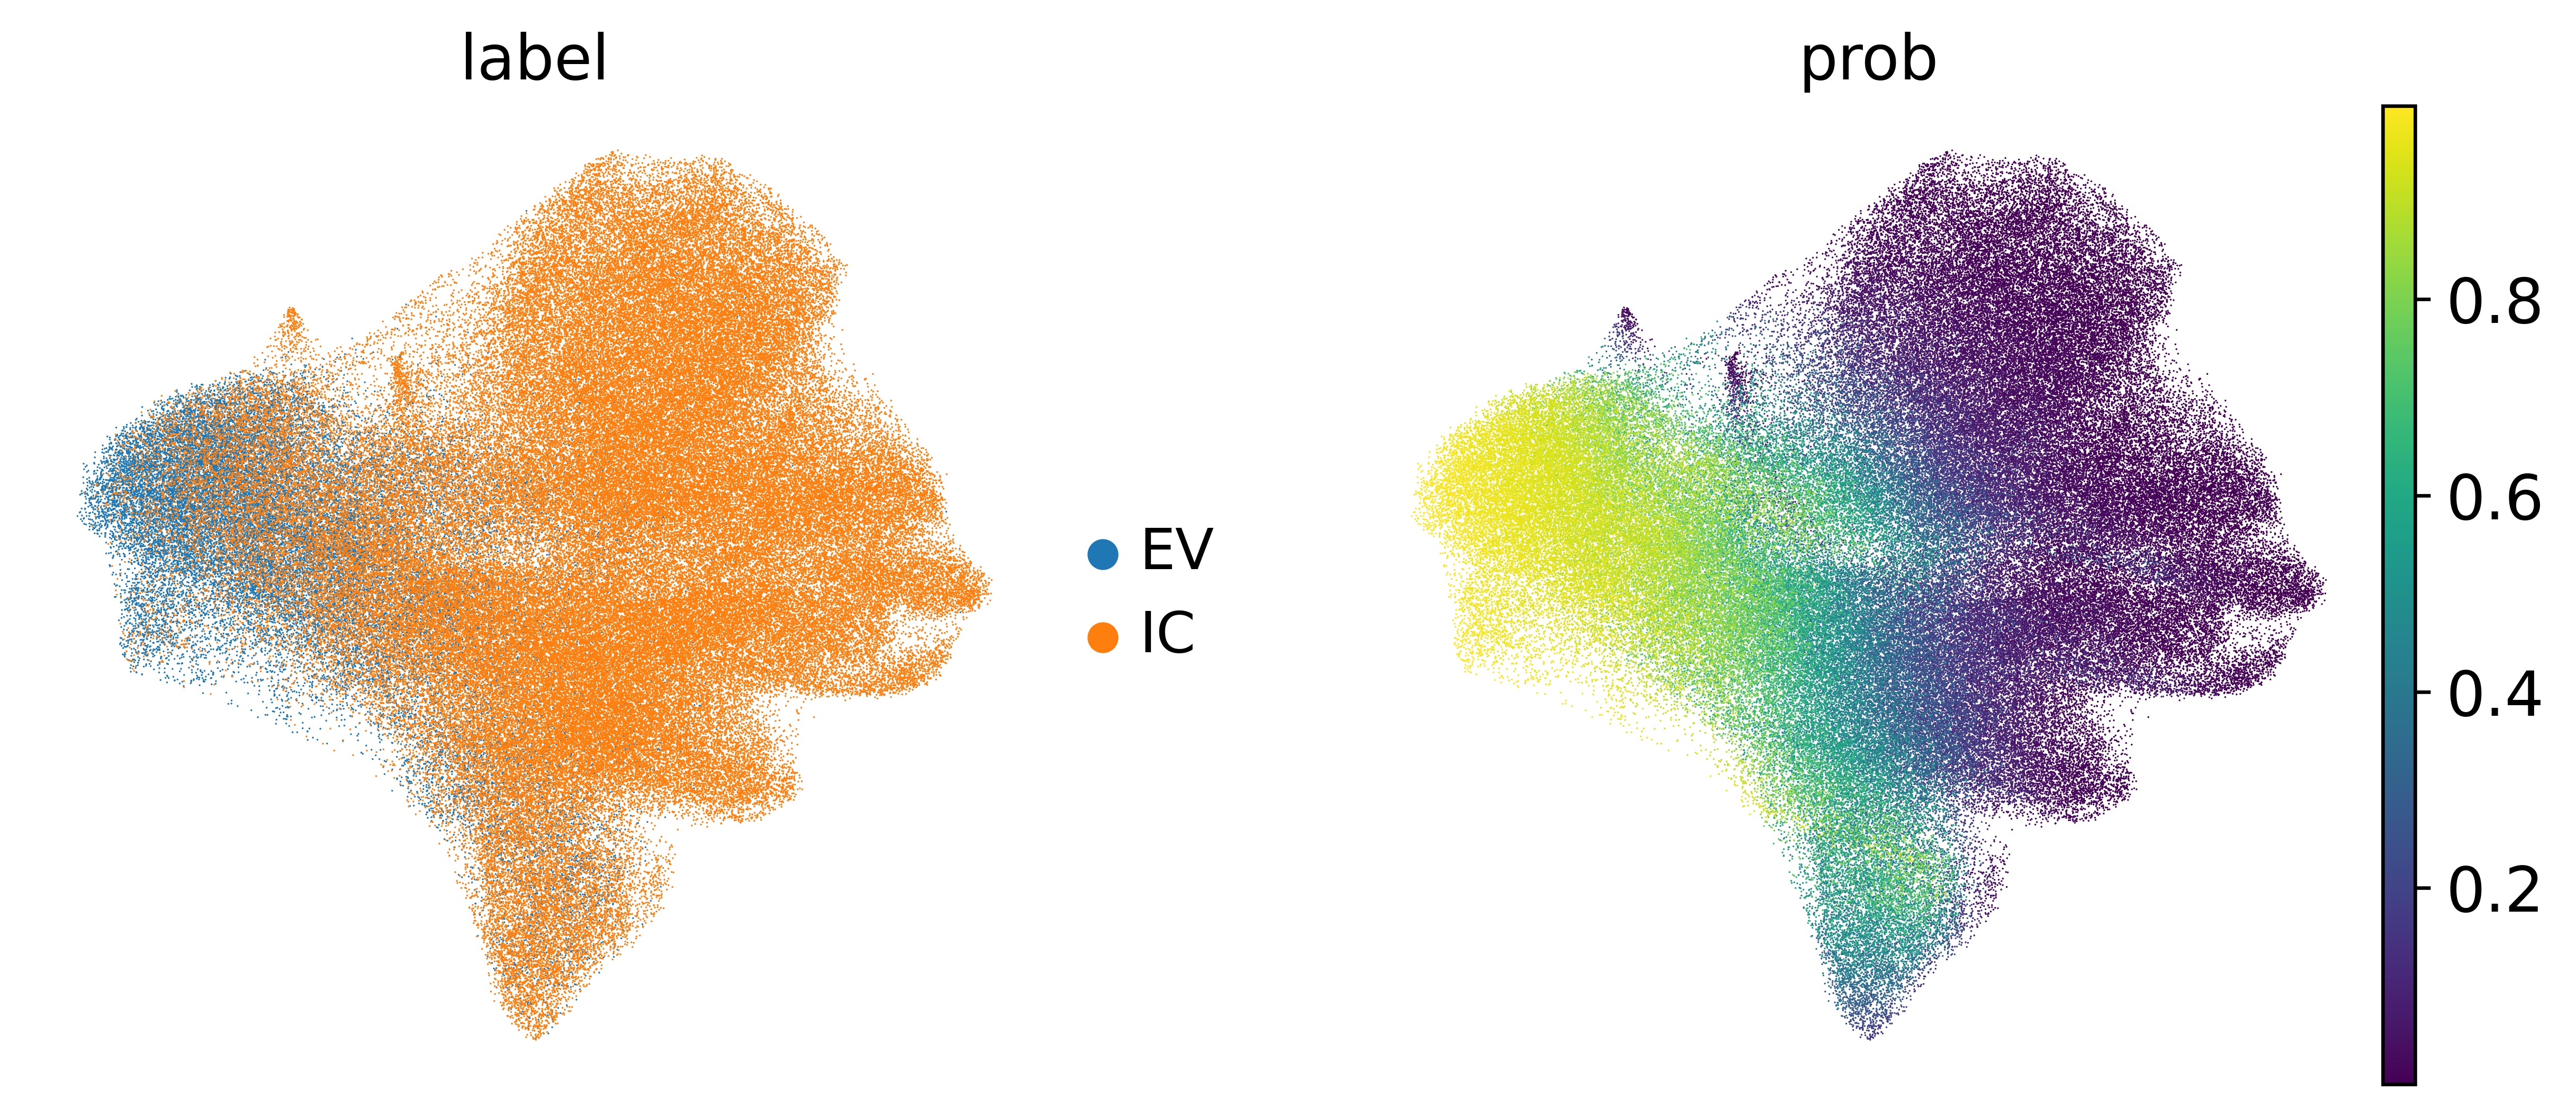

In [17]:
sc.pl.umap(emb_adata, color=['label', 'prob'], frameon=False)